# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import QTable, vstack

# IP Probabilities of unique data sets

## Nasa data

In [2]:
nasa_unique = QTable.read('data/unique_nasa.ecsv', format='ascii.ecsv')

In [3]:
# Convert to float if string
nasa_unique_ips = [float(x) for x in nasa_unique['ip']]
print(f"Minimum Impact Prob in Unique NASA: {min(nasa_unique_ips)}")

# Count how many are extremely low risk (< 1e-6)
nasa_low_risk_count = sum(1 for x in nasa_unique_ips if x < 1e-6)
print(f"Percentage of NASA unique objects that are low risk: {nasa_low_risk_count / len(nasa_unique_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-2)
nasa_high_risk_count = sum(1 for x in nasa_unique_ips if x > 1e-4)
print(f"Percentage of NASA unique objects that are high risk: {nasa_high_risk_count / len(nasa_unique_ips) * 100:.1f}%")

Minimum Impact Prob in Unique NASA: 1.008e-10
Percentage of NASA unique objects that are low risk: 87.4%
Percentage of NASA unique objects that are high risk: 2.4%


## Nasa data

In [4]:
esa_unique = QTable.read('data/unique_esa.ecsv', format='ascii.ecsv')

In [5]:
# Convert to float if string
esa_unique_ips = [float(x) for x in esa_unique['ip_cum']]
print(f"Minimum Impact Prob in Unique ESA: {min(esa_unique_ips)}")

# Count how many are extremely low risk (< 1e-6)
esa_low_risk_count = sum(1 for x in esa_unique_ips if x < 1e-6)
print(f"Percentage of ESA unique objects that are low risk: {esa_low_risk_count / len(esa_unique_ips) * 100:.1f}%")

# Count how many are extremely high risk (< 1e-2)
esa_high_risk_count = sum(1 for x in esa_unique_ips if x > 1e-4)
print(f"Percentage of ESA unique objects that are high risk: {esa_high_risk_count / len(esa_unique_ips) * 100:.1f}%")

Minimum Impact Prob in Unique ESA: 1.09e-11
Percentage of ESA unique objects that are low risk: 91.8%
Percentage of ESA unique objects that are high risk: 0.0%


## Probability Plot

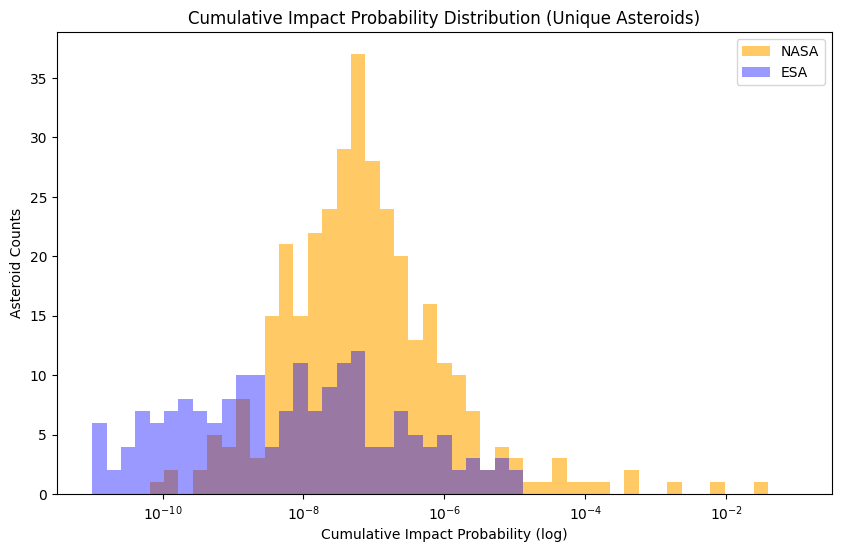

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

bins = np.logspace(-11, -1, 50)

ax.hist(nasa_unique_ips, bins=bins, alpha=0.6, label='NASA', color='orange')
ax.hist(esa_unique_ips, bins=bins, alpha=0.4, label='ESA', color='blue')

ax.set_xscale('log')

ax.set_title("Cumulative Impact Probability Distribution (Unique Asteroids)")
ax.set_xlabel("Cumulative Impact Probability (log)")
ax.set_ylabel("Asteroid Counts")

ax.legend();

plt.show()

## Nasa Unique High Risk

In [7]:
try:
    nasa_unique['ip'] = nasa_unique['ip'].astype(float)
except ValueError:
    print("Warning: Some IP values could not be converted. Check for empty strings.")

nasa_high_risk_table = nasa_unique[nasa_unique['ip'] > 1e-4]

print(f"Found {len(nasa_high_risk_table)} high-risk objects.")

nasa_high_risk_table

Found 8 high-risk objects.


last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id
str10,str17,str6,str18,float64,str10,str5,str9,str9,int64,str6,object,str7,str8
2022-08-24,5.10001588137266,-2.97,(2010 RF12),0.102637259069,2010 RF12,28.39,2095-2122,2459815.5,70,-2.97,0,0.0071,bK10R12F
2007-06-22,NaN,-4.45,(2006 RH120),0.00816650175,2006 RH120,29.64,2044-2124,2454273.5,119,-4.29,0,0.004,bK06RC0H
2022-11-29,4.62749782026075,-4.45,(2010 VQ),0.0015845932,2010 VQ,27.70,2087-2122,2459912.5,21,-4.41,0,0.0098,bK10V00Q
2014-02-12,1.48848922049079,-6.12,(2011 MD),0.00036184486,2011 MD,28.02,2098-2124,2456700.5,39,-5.40,0,0.0084,bK11M00D
2022-10-01,13.4228003014523,-5.28,(2022 SD9),0.000390246839,2022 SD9,28.41,2100-2122,2459853.5,22,-5.24,0,0.0071,bK22S09D
2020-05-20,NaN,-5.64,(2020 CD3),0.0252338159446,2020 CD3,31.75,2082-2118,2458989.5,115,-5.17,0,0.0015,bK20C03D
2015-09-12,6.29,-4.47,(2000 UK11),0.00011895,2000 UK11,25.00,2122-2122,2457277.5,2,-4.39,0,0.034,bK00U11K
2025-04-19,12.5879698322898,-4.46,(2025 HG),0.0002196587,2025 HG,26.63,2072-2124,2460784.5,10,-4.42,0,0.016,bK25H00G


## Esa Unique High Risk

In [8]:
try:
    esa_unique['ip_cum'] = esa_unique['ip_cum'].astype(float)
except ValueError:
    print("Warning: Some IP values could not be converted. Check for empty strings.")

esa_high_risk_table = esa_unique[esa_unique['ip_cum'] > 1e-4]

print(f"Found {len(esa_high_risk_table)} high-risk objects.")

esa_high_risk_table

Found 0 high-risk objects.


object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum
str26,str4,str1,str16,str8,str6,str1,str5,str9,float64,str6
